In [95]:
import math
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [96]:
def gaussFunction(x, y, sgm):
  return np.exp(-(x**2 + y**2)/(2 * sgm**2))/2 * np.pi * (sgm**2)

In [97]:
def buildGaussianFilter(sgm):
  kSize = 2 * int(4 * sgm + 0.5) + 1
  sum = 0
  gaussianKernel = np.zeros((kSize, kSize), np.float32)
  xMax = yMax = kSize//2
  for x in range(-xMax, xMax + 1):
        for y in range(-yMax, yMax + 1):
            val = gaussFunction(x, y, sgm)
            gaussianKernel[x + xMax, y + yMax] = val
            sum += val
  
  return gaussianKernel/sum

In [103]:
def applyFilter(img, kernel):
  hImg = img.shape[0]
  wImg = img.shape[1]
  
  hKernel = kernel.shape[0]
  wKernel = kernel.shape[1]
  
  h = hKernel // 2
  w = wKernel // 2

  padImg = np.pad(img, pad_width=((h, h),(w, w)), mode='constant', constant_values=0).astype(np.float32)
    
  appliedFilterImg = np.zeros(padImg.shape)
    
  for i in range(h, padImg.shape[0] - h):
    for j in range(w, padImg.shape[1] - w):
        x = padImg[i - h : i - h + hKernel, j - w : j - w + wKernel]
        x = x.flatten() * kernel.flatten()
        appliedFilterImg[i][j] = x.sum()
    
  return appliedFilterImg[h : -h, w : -w]

In [104]:
def compareImage(origImg, bluredImg, sgm):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 16))
    ax[0].imshow(cv2.cvtColor(origImg, cv2.COLOR_BGR2RGB))
    ax[0].set_title('Original', fontsize=24)
    ax[0].axis('off')
    ax[1].imshow(cv2.cvtColor(bluredImg, cv2.COLOR_BGR2RGB))
    ax[1].set_title('Gaussian Blurred sigma = ' + str(sgm), fontsize=24)
    ax[1].axis('off')
    plt.show()

In [105]:
def blurImage(img, sgm):
  kernel = buildGaussianFilter(sgm)
  bluredImg = np.zeros_like(img, dtype=np.uint8)
  for c in range(3):
    bluredImg[:,:,c] = applyFilter(img[:,:,c], kernel).astype(np.uint8)
  compareImage(img, bluredImg, sgm)

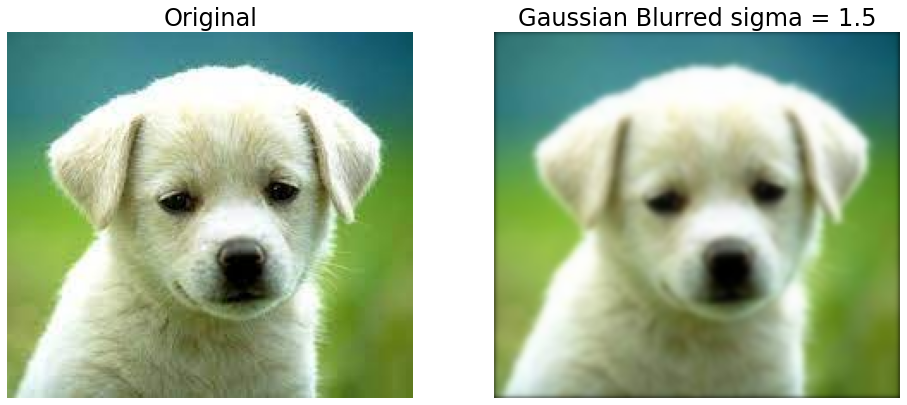

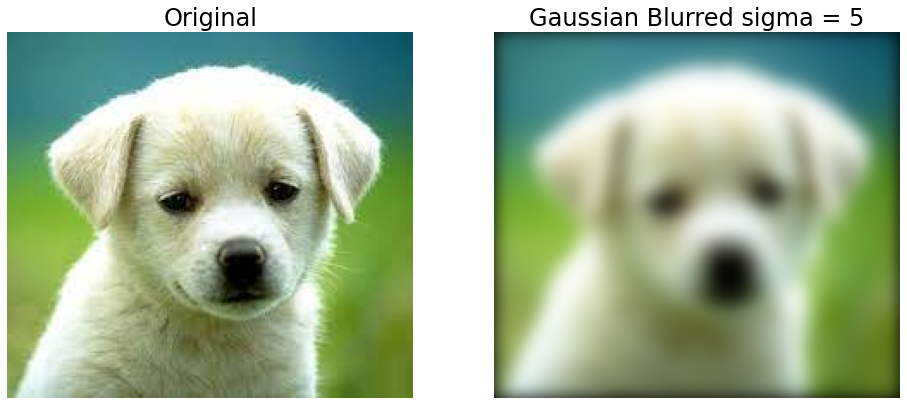

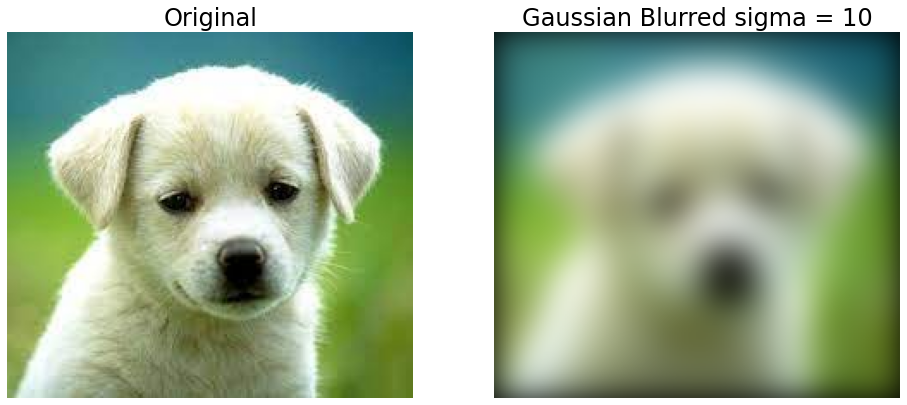

In [108]:
img = cv2.imread("sample_data/img.jpg")
blurImage(img, 1.5)
blurImage(img, 5)
blurImage(img, 10)